In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [11]:
# Import data
Stocks = data.DataReader(['KAT.L', 'COBR.L', 'PALM.L'], 'yahoo', start='2020/01/01', end=datetime.today().strftime('%Y-%m-%d'))
Stocks.head()

Attributes Adj Close                Close                 High                \
Symbols        KAT.L COBR.L PALM.L  KAT.L COBR.L PALM.L  KAT.L COBR.L PALM.L   
Date                                                                           
2020-01-02     0.925   1.25    NaN  0.925   1.25    NaN  0.850   1.25    NaN   
2020-01-03     0.925   1.25    NaN  0.925   1.25    NaN  0.930   1.25    NaN   
2020-01-06     0.925   1.25    NaN  0.925   1.25    NaN  0.940   1.25    NaN   
2020-01-07     0.925   1.25    NaN  0.925   1.25    NaN  0.925   1.25    NaN   
2020-01-08     0.925   1.25    NaN  0.925   1.25    NaN  0.925   1.25    NaN   

Attributes    Low                 Open                  Volume                
Symbols     KAT.L COBR.L PALM.L  KAT.L COBR.L PALM.L     KAT.L COBR.L PALM.L  
Date                                                                          
2020-01-02  0.850   1.25    NaN  0.925   1.25    NaN    1000.0    0.0    NaN  
2020-01-03  0.930   1.25    NaN  0.925   1.25    NaN  100000.0    0.0    NaN  
2020-01-06  0.850   1.25    NaN  0.925   1.25    NaN    7825.0    0.0    NaN  
2020-01-07  0.925   1.25    NaN  0.925   1.25    NaN       0.0    0.0    NaN  
2020-01-08  0.925   1.25    NaN  0.925   1.25    NaN       0.0    0.0    NaN

In [13]:
# Closing price
df = Stocks['Adj Close']
df.head(8)

Symbols,KAT.L,COBR.L,PALM.L
Date,,,
2020-01-02,0.925,1.25,NaN
2020-01-03,0.925,1.25,NaN
2020-01-06,0.925,1.25,NaN
2020-01-07,0.925,1.25,NaN
2020-01-08,0.925,1.25,NaN
2020-01-09,0.925,1.25,6.50
2020-01-10,0.925,1.25,6.15
2020-01-13,0.925,1.25,4.35
2020-01-14,0.925,1.25,4.35


In [14]:
df['PALM.L'] = df['PALM.L'].fillna(6.5) # fillna with initial price

<ipython-input-14-b34b20933b81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PALM.L'] = df['PALM.L'].fillna(6.5)


In [15]:
df.head()

Symbols,KAT.L,COBR.L,PALM.L
Date,,,
2020-01-02,0.925,1.25,6.5
2020-01-03,0.925,1.25,6.5
2020-01-06,0.925,1.25,6.5
2020-01-07,0.925,1.25,6.5
2020-01-08,0.925,1.25,6.5


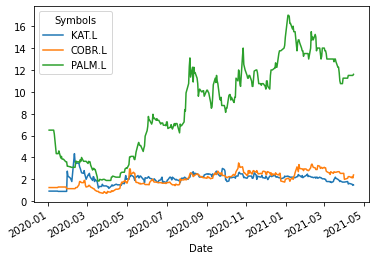

In [16]:
df.plot();

In [17]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,KAT.L,COBR.L,PALM.L
Symbols,,,
KAT.L,0.010181,0.000134,0.000309
COBR.L,0.000134,0.005486,0.001019
PALM.L,0.000309,0.001019,0.003690


In [18]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,KAT.L,COBR.L,PALM.L
Symbols,,,
KAT.L,1.000000,0.017931,0.050481
COBR.L,0.017931,1.000000,0.226430
PALM.L,0.050481,0.226430,1.000000


In [19]:
# need automation
w = {'KAT.L': 0.3, 'COBR.L': 0.5, 'PALM.L': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0027165859083505242

In [20]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
KAT.L    -0.337778
COBR.L    0.200000
PALM.L   -0.226667
dtype: float64

In [22]:
# Portfolio returns
w = [0.3, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

-0.04666663646697996

In [23]:
# Volatility is given by the annual standard deviation. Multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
KAT.L     1.595373
COBR.L    1.171154
PALM.L    0.960496
dtype: float64

In [24]:
# Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
KAT.L,-0.337778,1.595373
COBR.L,0.200000,1.171154
PALM.L,-0.226667,0.960496


In [25]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights,cumulative sum must be 1

num_assets = len(df.columns)
num_portfolios = 10000 # Run 10000 times

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [26]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,KAT.L weight,COBR.L weight,PALM.L weight
0,-0.093399,0.776856,0.069189,0.330365,0.600446
1,-0.156053,0.868842,0.449014,0.282432,0.268555
2,0.086247,0.944687,0.033072,0.742005,0.224923
3,-0.199583,1.083325,0.641685,0.230583,0.127732
4,-0.209023,0.885533,0.469408,0.163595,0.366997


In [32]:
portfolios.Returns.max()

0.19181922395925813

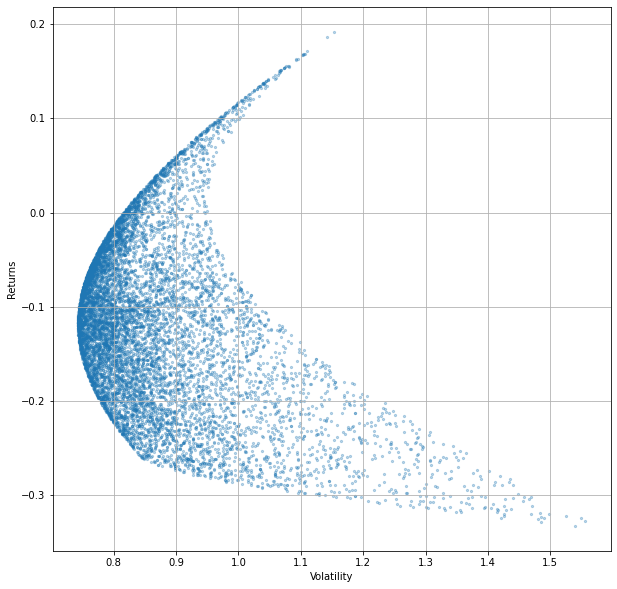

In [27]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=5, alpha=0.3, grid=True, figsize=[10,10]);

In [28]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         -0.117495
Volatility       0.742801
KAT.L weight     0.197541
COBR.L weight    0.307314
PALM.L weight    0.495145
Name: 7431, dtype: float64

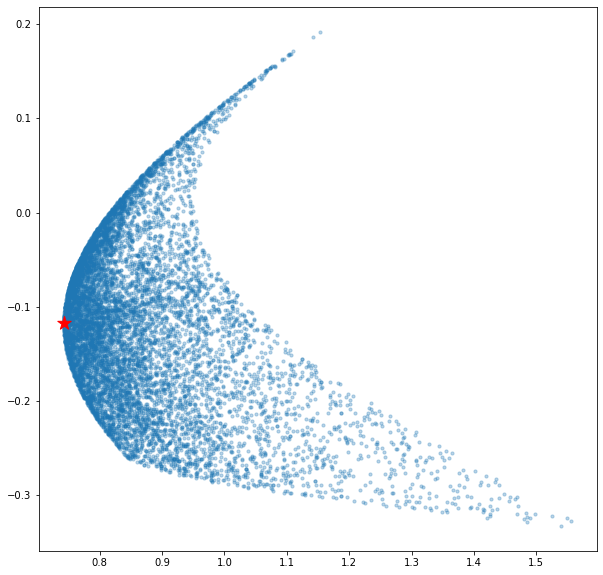

In [29]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);

In [30]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns          0.191819
Volatility       1.153969
KAT.L weight     0.014556
COBR.L weight    0.984617
PALM.L weight    0.000827
Name: 7984, dtype: float64

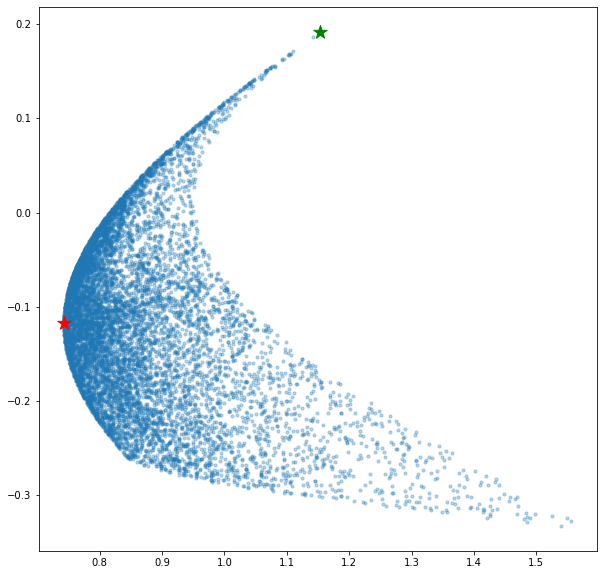

In [31]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=200);